In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_profiling


In [17]:
df = pd.read_csv(r'diabetes.csv')

In [3]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
# 8 numerical and
# 1 categorical:- outcome 1/0

In [5]:
#pandas_profiling.ProfileReport(data)

In [18]:
df.shape

(768, 9)

In [19]:
df.isna().sum()

# no missing data

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

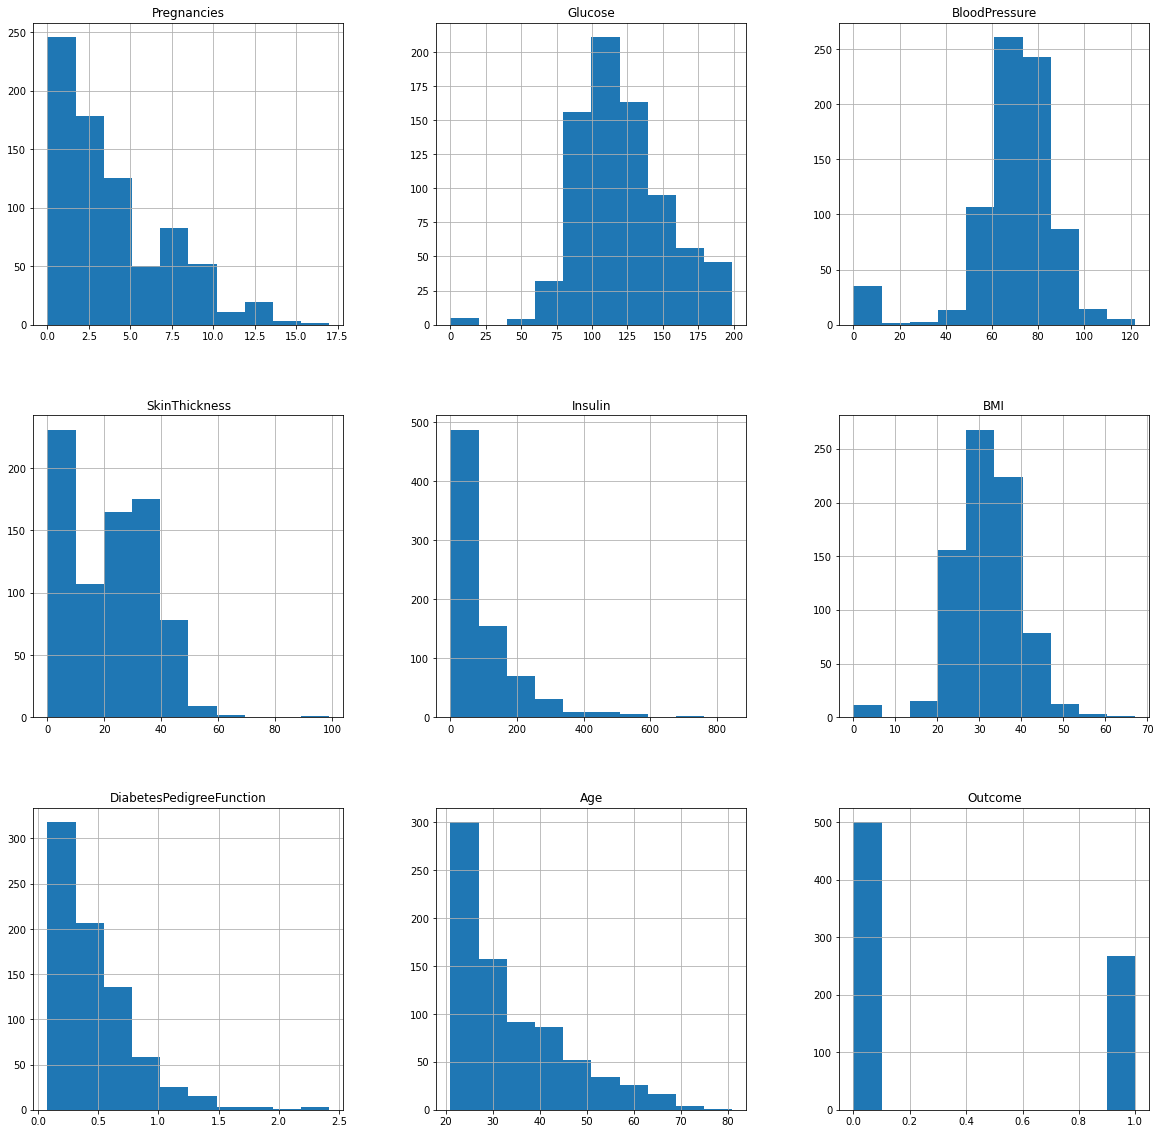

In [72]:
df.hist(figsize=(20,20))
plt.show()

In head we can see most data in Glucose,BloodPressure,SkinThickness,Insulin,others have some values as 0 which is abnormal, so we can say that these are missing values in dataset.
so i will replace these values with NaN

In [64]:
# selecting rows except than prgenancies and Outcome

df1 = df.copy(deep=True) # using the copy of original df

df1.iloc[:,1:-1] = df1.iloc[:,1:-1].replace(0,np.NaN)
df1

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.0,180.0,32.9,0.171,63,0
764,2,122.0,70.0,27.0,NaN,36.8,0.340,27,0
765,5,121.0,72.0,23.0,112.0,26.2,0.245,30,0
766,1,126.0,60.0,NaN,NaN,30.1,0.349,47,1


In [65]:
df1.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

Now we will apply mean values of each column to null values of respective columns

## Imputing the mean values to missing/ Nan values

In [66]:


# Mean is preferred if data is numeric and not skewed
# Median is preferred if data is numeric and skewed

df1.Glucose.fillna(df1.Glucose.mean(),inplace=True)
df1.BloodPressure.fillna(df1.BloodPressure.mean(),inplace=True)

df1.SkinThickness.fillna(df1.SkinThickness.median(),inplace=True)
df1.Insulin.fillna(df1.Insulin.median(),inplace=True)
df1.BMI.fillna(df1.BMI.median(),inplace=True)

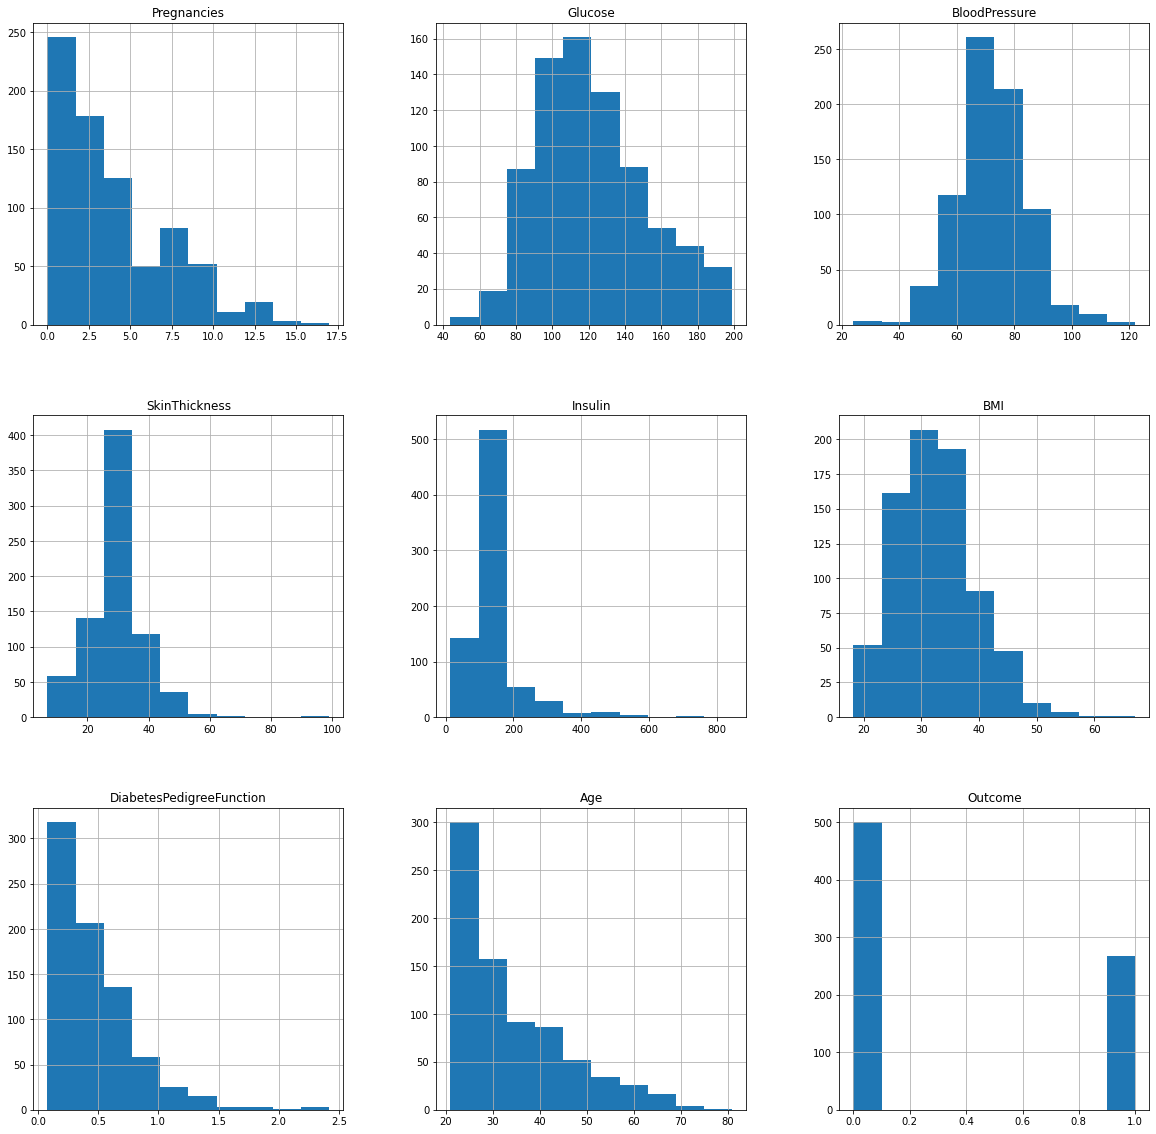

In [74]:
df1.hist(figsize=(20,20))
plt.show()

In [22]:
df.Outcome.value_counts()

0    500
1    268
Name: Outcome, dtype: int64

<AxesSubplot:xlabel='Outcome', ylabel='count'>

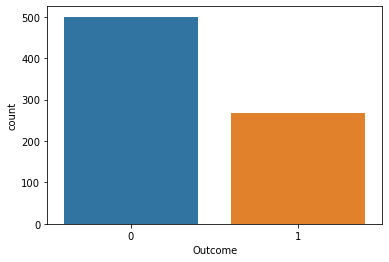

In [30]:
sns.countplot(x='Outcome', data=df)

 Outcome 0 is nearly double of 1, i.e. diabetic patients is half of non-diabetic

C:\Users\pruthvi katware\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:>

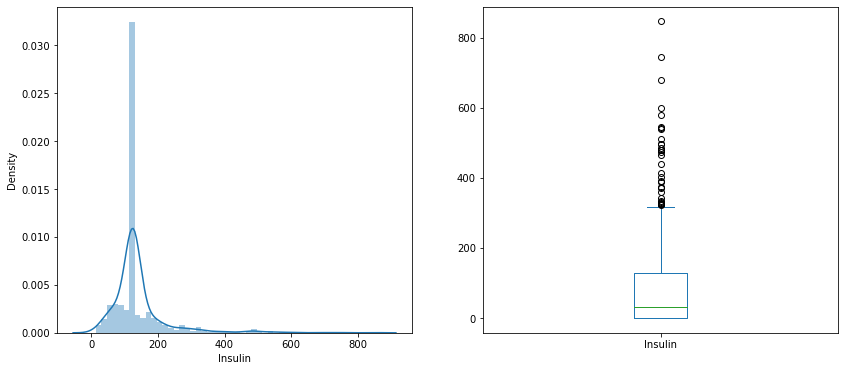

In [95]:
plt.subplot(121)
sns.distplot(df1.Insulin)
plt.subplot(122)
df.Insulin.plot.box(figsize=(14,6))

In [96]:
df1.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.127911,0.208522,0.081770,0.025047,0.021559,-0.033523,0.544341,0.221898
Glucose,0.127911,1.000000,0.218367,0.192686,0.419064,0.231128,0.137060,0.266534,0.492928
BloodPressure,0.208522,0.218367,1.000000,0.191853,0.045087,0.281199,-0.002763,0.324595,0.166074
SkinThickness,0.081770,0.192686,0.191853,1.000000,0.155610,0.543205,0.102188,0.126107,0.214873
Insulin,0.025047,0.419064,0.045087,0.155610,1.000000,0.180241,0.126503,0.097101,0.203790
BMI,0.021559,0.231128,0.281199,0.543205,0.180241,1.000000,0.153438,0.025597,0.312038
DiabetesPedigreeFunction,-0.033523,0.137060,-0.002763,0.102188,0.126503,0.153438,1.000000,0.033561,0.173844
Age,0.544341,0.266534,0.324595,0.126107,0.097101,0.025597,0.033561,1.000000,0.238356
Outcome,0.221898,0.492928,0.166074,0.214873,0.203790,0.312038,0.173844,0.238356,1.000000


### Heamtmap

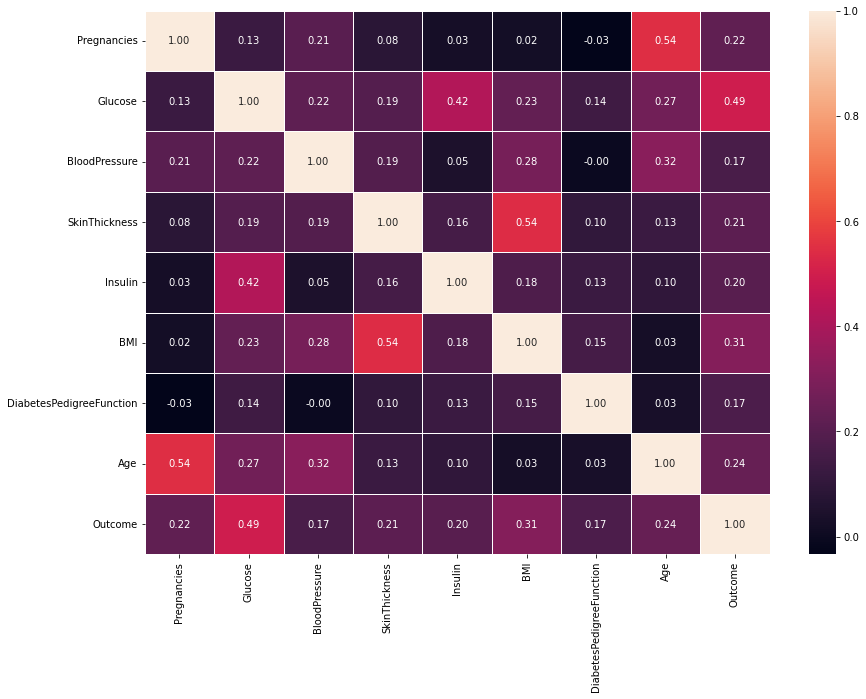

In [98]:
plt.figure(figsize=(14,10))
sns.heatmap(df1.corr(),annot=True,fmt='.2f',linewidths=.7)
plt.show()

### Logistic Regression

In [108]:
from sklearn.model_selection import train_test_split
from sklearn import linear_model

In [103]:
x = df1.iloc[:,:-2]

In [106]:
y = df1['Outcome']

In [109]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2,random_state=42)

In [110]:
diabetes_model = linear_model.LogisticRegression()

In [111]:
diabetes_model.fit(xtrain,ytrain)

LogisticRegression()

In [112]:
ypred = diabetes_model.predict(xtest)
ypred

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
      dtype=int64)

In [115]:
diabetes_model.score(xtest,ytest)*100

76.62337662337663